<a href="https://colab.research.google.com/github/mtermor/NTIC_DeepLearning/blob/main/NLP/02_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/eduardofc/data/main/amazon_sports.csv")
df['review_body'] = df['review_body'].str.replace('[^a-zA-ZñÑáéíóú .,:;]', '', regex=True)
df['review_body'] = df['review_body'].str.lower()
df.head()

,stars,review_body,review_title,product_category
0,1,nunca llego el pedido y el vendedor pasa de todo no contestan,No llego nunca,sports
1,1,"no sé como es, porque debería haber llegado ayer día de marzo, y hoy por la noche sigo esperando que llegue el frontal. y me habéis mandado el formulario de opinión. pues de momento mala no ha cumplido con la fecha de entrega.",Todavía no ha llegado,sports
2,1,"guantes cómodos, no lo niego, pero de mala calidad. yo creo que en caso de caída no valdrian para mucho, dos meses de uso y se están rajando.",Guantes de baja calidad,sports
3,1,hasta hoy no he visto el producto. el pedido hace ya casi mes. y notifico que he usado prime para está compra.,Muy Mala experiencia,sports
4,1,"no puedo valorarla porque, después de casi una semana, aún no he recibido mi pedido. pienso que amazon tendría que valorar las compañías de transporte con que trabaja, porque es indignante que pague mi cuota prime y nunca reciba mi pedido el día que toca",Paquete perdido?,sports


In [3]:
df.groupby('stars').size()

stars
1    2438
2    2551
3    2828
4    2860
5    2512
dtype: int64

In [4]:
""" Clasificamos en positivo (stars 4-5) y negativo (stars 1-2) """
df = df[df.stars != 3]
df['bad_product'] = (df.stars < 3).astype(int)
df.groupby('bad_product').size()

bad_product
0    5372
1    4989
dtype: int64

# Modelling for Classification

## Inputs (preprocessing)

In [5]:
X = df.review_body.values
y = df.bad_product

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
# tokenizer.index_word
X_tokenized = tokenizer.texts_to_sequences(X)
# X_tokenized

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50
X_padded = pad_sequences(X_tokenized, maxlen=max_len, truncating='post')
# X_padded

## Model (NN)

In [8]:
import tensorflow.keras as keras

keras.utils.set_random_seed(812)

In [9]:
from keras import Sequential
from keras.layers import Flatten, Dense, Embedding

embedding_dim = 2

model = keras.Sequential()

# Capas de embeddings
model.add(Embedding(input_length= max_len, input_dim=vocab_size, output_dim=embedding_dim))
model.add(Flatten())
# Capas de clasificación
# model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 2)             20000     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20101 (78.52 KB)
Trainable params: 20101 (78.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
n_epochs = 20

model.fit(X_padded, y, epochs= n_epochs)

Epoch 1/20
324/324 [==============================] - 22s 60ms/step - loss: 0.6621 - accuracy: 0.6195
Epoch 2/20
324/324 [==============================] - 4s 11ms/step - loss: 0.5053 - accuracy: 0.7949
Epoch 3/20
324/324 [==============================] - 3s 10ms/step - loss: 0.3877 - accuracy: 0.8505
Epoch 4/20
324/324 [==============================] - 3s 9ms/step - loss: 0.3293 - accuracy: 0.8751
Epoch 5/20
324/324 [==============================] - 3s 9ms/step - loss: 0.2912 - accuracy: 0.8906
Epoch 6/20
324/324 [==============================] - 2s 5ms/step - loss: 0.2626 - accuracy: 0.9024
Epoch 7/20
324/324 [==============================] - 2s 5ms/step - loss: 0.2387 - accuracy: 0.9147
Epoch 8/20
324/324 [==============================] - 2s 6ms/step - loss: 0.2188 - accuracy: 0.9239
Epoch 9/20
324/324 [==============================] - 2s 5ms/step - loss: 0.2021 - accuracy: 0.9296
Epoch 10/20
324/324 [==============================] - 2s 7ms/step - loss: 0.1874 - accuracy: 0.

# Embeddings Layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 2)             20000     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20101 (78.52 KB)
Trainable params: 20101 (78.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
embed_layer = model.layers[0]
embed_weights = embed_layer.get_weights()[0]
print(embed_weights.shape)
embed_weights

(10000, 2)


array([[-0.05058567, -0.04176808],
       [-0.1910364 ,  0.2953519 ],
       [ 0.06250687, -0.03166124],
       ...,
       [ 0.09126089, -0.05233277],
       [ 0.29651302, -0.2588437 ],
       [ 0.22588553, -0.25242013]], dtype=float32)

In [23]:
for v in ['bueno', 'malo', 'horrible']:
  k = tokenizer.word_index[v]
  print(f'{v}: {k}: {embed_weights[k]}')

bueno: 92: [-0.37987083  0.4268919 ]
malo: 215: [-0.05720437 -0.50714517]
horrible: 1265: [ 0.7407763 -0.7420258]


In [24]:
words = []
x_axis = []
y_axis = []

for k, v in tokenizer.index_word.items():
  x, y = embed_weights[k]
  words.append(v)
  x_axis.append(x)
  y_axis.append(y)
  if k == 1500:
    break

In [26]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()

source = ColumnDataSource(data=dict(x=x_axis, y=y_axis, words=words))
p = figure(tools='', title='2-dim embeddings space')
p.circle('x', 'y', size=2, source=source)
hover = HoverTool()
hover.tooltips = [('Palabra', '@words'), ('(x,y)','($x, $y)')]
p.add_tools(hover)
show(p)

# Distancia del coseno
Similitud del coseno

In [27]:
for v in ['bueno', 'malo', 'horrible']:
  k = tokenizer.word_index[v]
  print(f'{v}: {k}: {embed_weights[k]}')

bueno: 92: [-0.37987083  0.4268919 ]
malo: 215: [-0.05720437 -0.50714517]
horrible: 1265: [ 0.7407763 -0.7420258]


In [28]:
import numpy as np

# Recomendacion de películas
# (comedia, intriga, terror, thriller, aventuras, sci-fi) n=6 dimensiones

v_toy_story     = np.array([3, 1, 0, 1, 5, 4])
v_mission_imp   = np.array([2, 5, 0, 5, 4, 2])
v_jurassic_park = np.array([1, 2, 1, 3, 5, 3])
v_exorcista     = np.array([0, 4, 5, 3, 1, 2])

In [30]:
print(np.dot(v_toy_story, v_mission_imp))
print(np.dot(v_toy_story, v_jurassic_park))
print(np.dot(v_toy_story, v_exorcista))

44
45
20


In [31]:
# Una película con todo 5s tendría muchos más puntos independientemente de con que
# El que tenga más "puntos" en el vector es el que más puntos tiene en el producto escalar

In [32]:
print(v_toy_story.sum())
print(v_mission_imp.sum())
print(v_jurassic_park.sum())
print(v_exorcista.sum())


14
18
15
15


In [35]:
print(np.linalg.norm(v_toy_story))
print(np.linalg.norm(v_mission_imp))
print(np.linalg.norm(v_jurassic_park))
print(np.linalg.norm(v_exorcista))

7.211102550927978
8.602325267042627
7.0
7.416198487095663


In [37]:
print(np.dot(v_toy_story/ np.linalg.norm(v_toy_story), v_mission_imp / np.linalg.norm(v_mission_imp)))

0.7093084682410772


In [40]:
print(np.dot(v_toy_story, v_mission_imp) / (np.linalg.norm(v_toy_story) * np.linalg.norm(v_mission_imp)))
print(np.dot(v_toy_story, v_jurassic_park) / (np.linalg.norm(v_toy_story) * np.linalg.norm(v_jurassic_park)))
print(np.dot(v_toy_story, v_exorcista) / (np.linalg.norm(v_toy_story) * np.linalg.norm(v_exorcista)))

0.7093084682410772
0.8914824582191182
0.3739787960033829


In [42]:
def dist_cosine(v1, v2):
  d = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
  return d

# dist_cosine(v_toy_story, v_exorcista)

0.3739787960033829

In [47]:
for v in ['bueno', 'malo', 'horrible', 'encantado','mucho']:
  k = tokenizer.word_index[v]
  print(f'{v}: {k}: {embed_weights[k]}')

bueno: 92: [-0.37987083  0.4268919 ]
malo: 215: [-0.05720437 -0.50714517]
horrible: 1265: [ 0.7407763 -0.7420258]
encantado: 285: [-1.0762715  1.2655139]
mucho: 41: [-0.09403238  0.07717179]


In [49]:
v_bueno = embed_weights[92]
v_malo = embed_weights[215]
v_horrible = embed_weights[1265]
v_encantado = embed_weights[285]
v_mucho = embed_weights[41]


print(f'bueno y malo: {dist_cosine(v_bueno, v_malo):.3f}')
print(f'bueno y horrible: {dist_cosine(v_bueno, v_horrible):.3f}')
print(f'horrible y malo: {dist_cosine(v_horrible, v_malo):.3f}')
print(f'horrible y encantado: {dist_cosine(v_horrible, v_encantado):.3f}')
print(f'bueno y encantado: {dist_cosine(v_bueno, v_encantado):.3f}')
print(f'bueno y mucho: {dist_cosine(v_bueno, v_mucho):.3f}')

bueno y malo: -0.668
bueno y horrible: -0.998
horrible y malo: 0.624
horrible y encantado: -0.997
bueno y encantado: 1.000
bueno y mucho: 0.988


# Word2Vec

## Dataset

In [52]:
reviews = list(df.review_body.values)
reviews[:2]

['nunca llego el pedido y el vendedor pasa de todo no contestan',
 'no sé como es, porque debería haber llegado ayer día  de marzo, y hoy  por la noche sigo esperando que llegue el frontal. y me habéis mandado el formulario de opinión. pues de momento mala no ha cumplido con la fecha de entrega.']

In [57]:
sentences = []
for rr in reviews:
  ss = rr.split('.')
  for s in ss:
    s = s.strip()
    if len(s)>1:
      s = s.replace(" ", " ")
      sentences.append(s)

sentences[:10]

['nunca llego el pedido y el vendedor pasa de todo no contestan',
 'no sé como es, porque debería haber llegado ayer día  de marzo, y hoy  por la noche sigo esperando que llegue el frontal',
 'y me habéis mandado el formulario de opinión',
 'pues de momento mala no ha cumplido con la fecha de entrega',
 'guantes cómodos, no lo niego, pero de mala calidad',
 'yo creo que en caso de caída no valdrian para mucho, dos meses de uso y se están rajando',
 'hasta hoy no he visto el producto',
 'el pedido hace ya casi  mes',
 'y notifico que he usado prime para está compra',
 'no puedo valorarla porque, después de casi una semana, aún no he recibido mi pedido']

In [59]:
word_senteces = [ss.split() for ss in sentences]
word_senteces[0]

['nunca',
 'llego',
 'el',
 'pedido',
 'y',
 'el',
 'vendedor',
 'pasa',
 'de',
 'todo',
 'no',
 'contestan']

## Model

In [64]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=word_senteces,
    vector_size=20,
    window=3,
)

In [65]:
model.wv['bueno']

array([ 0.7100317 , -0.86969006,  1.2913803 ,  0.99611765, -0.01499331,
       -0.12842079,  0.7273801 ,  1.7305533 , -0.97096056,  0.982112  ,
        0.46056947,  0.17415763,  0.04773033,  0.22705363,  1.3044175 ,
        0.4016647 ,  1.0956801 ,  0.7215947 , -0.6556055 , -0.4012187 ],
      dtype=float32)

## Exploración

In [66]:
model.wv.most_similar(positive=['bueno'])

[('bonito', 0.9754291772842407),
 ('cómodo', 0.9542643427848816),
 ('resistente', 0.9531101584434509),
 ('bonita', 0.9285375475883484),
 ('cómoda', 0.9209259748458862),
 ('diseño', 0.9162457585334778),
 ('práctica,', 0.9131780862808228),
 ('tacto', 0.9093831777572632),
 ('tejido', 0.909112274646759),
 ('bonito,', 0.9078893661499023)]

In [68]:
model.wv.most_similar(positive=['buenos'])

[('aparentemente', 0.9708684682846069),
 ('acabados', 0.9703000783920288),
 ('bonitas', 0.962518572807312),
 ('materiales', 0.9608908891677856),
 ('materiales,', 0.9591049551963806),
 ('facil', 0.9574642777442932),
 ('cómodos', 0.9557759761810303),
 ('resistente,', 0.9555202126502991),
 ('bonitos', 0.955443799495697),
 ('buenos,', 0.9551437497138977)]

In [69]:
model.wv.similarity('buenos','bonitas')

0.9625185

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [75]:
words1 = [w for w, _ in model.wv.most_similar(positive=['bueno'])]
words1 = words1[:4]
words2 = [w for w, _ in model.wv.most_similar(positive=['buenos'])]
words2 = words2[:4]

print(words1)
print(words2)

['bonito', 'cómodo', 'resistente', 'bonita']
['aparentemente', 'acabados', 'bonitas', 'materiales']


In [77]:
words = words1 + words2

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

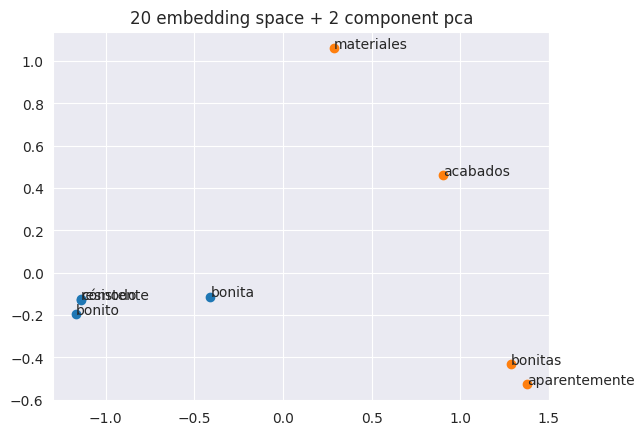

In [78]:
plt.scatter(result[:len(words1),0], result[:len(words1), 1])
plt.scatter(result[len(words1):,0], result[len(words1):, 1])

for i, w in enumerate(words):
  plt.annotate(w, xy=(result[i, 0], result[i, 1]))
plt.title('20 embedding space + 2 component pca')
plt.show()

# Sentence-Transformer

## Dataset

In [81]:
df_st = df.sample(2000, replace=False, random_state=99)
print(len(df_st))

reviews = list(df_st.review_body.values)
reviews[:2]

2000


['lo quería porque trabajo en un club de fútbol y parece una buena herramienta. el problema está que no llegó nunca, y amazon me reembolsó lo pagado.',
 'por el precio está bien, aunque la calidad es media. tampoco lo veo tan sólido como para poner mucho peso.']

In [90]:
df_st.groupby('bad_product').size()

bad_product
0    1023
1     977
dtype: int64

## Model

In [85]:
#!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [87]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [88]:
embeddings = model.encode(reviews, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

## Visualization

In [89]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    n_iter=300
)
tsne_data = tsne.fit_transform(embeddings)

In [91]:
df_st[['x', 'y']] = tsne_data
df_st.head()

,stars,review_body,review_title,product_category,bad_product,x,y
1187,1,"lo quería porque trabajo en un club de fútbol y parece una buena herramienta. el problema está que no llegó nunca, y amazon me reembolsó lo pagado.",Que llegue el producto,sports,1,-6.702146,-3.113178
8602,4,"por el precio está bien, aunque la calidad es media. tampoco lo veo tan sólido como para poner mucho peso.",Calidad media,sports,0,-2.087937,2.080775
10734,5,"la correa encaja perfectamente, viene con todo lo necesario para poder colocarla. es cuestión de unos pocos minutos. recomendada. saludos.",Correa de sustitución,sports,0,2.175499,3.906176
10822,5,"ha sido una buena compra, después de dos semanas de uso. he sentido mucha mejoría, apenas podía caminar, y ahora lo puedo hacer perfectamente. siempre lo traigo puesto",Excelente producto,sports,0,1.177303,3.141449
8985,4,"dan el pego vaya que si, tengo la misma en dos modelos",Buena compra,sports,0,-1.390544,0.510004


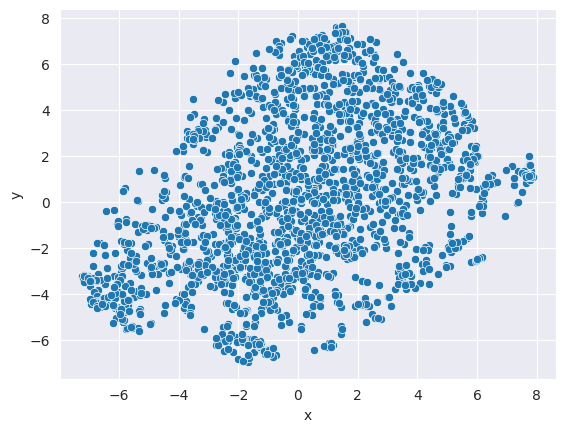

In [92]:
sns.scatterplot(data=df_st, x='x', y='y')
plt.show()

In [98]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap

source = ColumnDataSource(data={
    'x': df_st['x'],
    'y': df_st['y'],
    'code': df_st['bad_product'],
    'post': df_st['review_body']
})

mapper = linear_cmap(
    field_name='code',
    palette=Viridis256,
    low=0, high=2
)

p = figure(width=800, height=700, tools='pan,wheel_zoom,box_zoom,reset,hover,save')
p.circle('x','y',size=4, source=source, color=mapper, legend_group='code')

hover = p.select_one(HoverTool)
hover.tooltips = [
    ('Post', '@post')
]
show(p)